In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
social=pd.read_csv("Social_Network_Ads.csv")
social

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
social.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
social.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
social.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x = social[['Age','EstimatedSalary']]
y = social['Purchased']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [11]:
prediction = knn.predict(x_test)
prediction

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [12]:
from sklearn.metrics import accuracy_score
accurate = accuracy_score(y_test,prediction)*100
print("Accuracy score is:",accurate,"%")

Accuracy score is: 91.66666666666666 %


In [13]:
from matplotlib.colors import ListedColormap
X_set,y_set=x_train,y_train

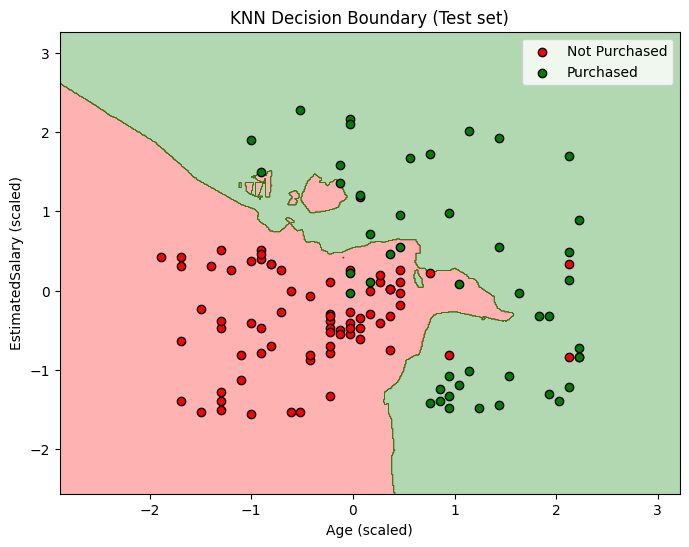

In [14]:
# Use the test set (X_test is scaled numpy array)
x_set = x_test
y_set = y_test.values if hasattr(y_test, 'values') else y_test

# Create meshgrid over feature space
x1_min, x1_max = x_set[:, 0].min() - 1, x_set[:, 0].max() + 1
x2_min, x2_max = x_set[:, 1].min() - 1, x_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

# Predict for each point on the grid
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
Z = knn.predict(grid_points)
Z = Z.reshape(xx1.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=ListedColormap(('red', 'green')))

# Scatter test points with true labels
plt.scatter(x_set[y_set == 0, 0], x_set[y_set == 0, 1], c='red', edgecolor='k', label='Not Purchased')
plt.scatter(x_set[y_set == 1, 0], x_set[y_set == 1, 1], c='green', edgecolor='k', label='Purchased')

plt.title('KNN Decision Boundary (Test set)')
plt.xlabel('Age (scaled)')
plt.ylabel('EstimatedSalary (scaled)')
plt.legend()
plt.show()